In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

#import the relevant packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
print(tf.version)
print(tf.keras.__version__)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>
2.4.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'


/content/drive/My Drive/Colab Notebooks


In [ ]:
# load numpy array from npy file
from numpy import load
# load array
data = load('fmnist_train.npy', allow_pickle=True).item()
testdata = load('fmnist_test.npy', allow_pickle=True).item()

In [ ]:
data['features'].shape

(60000, 28, 28)

In [ ]:
x_train1 = data['features'].reshape([60000, 28*28])
y_train1 = data['target'].astype(int) - 1

x_test1 = testdata['features'].reshape([10000, 28*28])

In [ ]:
y_train1


array([4, 1, 0, ..., 2, 0, 3])

In [ ]:
# split the training data into train and validate arrays (will be used later)
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train1, y_train1, test_size=0.4, random_state=12345,
)

x_test, x_validate, y_test, y_validate = train_test_split(
    x_validate, y_validate, test_size=0.5, random_state=12345,
)

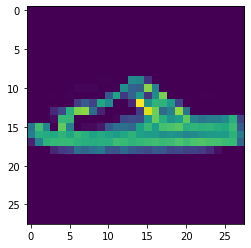

In [ ]:
# lets see what the images look like

image = x_train[500, :].reshape((28, 28))

plt.imshow(image)
plt.show()

## Create the CNN

*   Define the model
* Compile the model
* Fit the model



In [ ]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))


x_train shape: (36000, 28, 28, 1)
x_test shape: (12000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [ ]:


cnn_model_1 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(5, activation='sigmoid')
])

print(cnn_model_1.summary())

cnn_model_1.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                173088    
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 165       
Total params: 173,573
Trainable params: 173,573
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history1 = cnn_model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate)
)


Epoch 1/10
71/71 [==============================] - 1s 9ms/step - loss: 1.0267 - accuracy: 0.5878 - val_loss: 0.6529 - val_accuracy: 0.7406
Epoch 2/10
71/71 [==============================] - 0s 6ms/step - loss: 0.6329 - accuracy: 0.7404 - val_loss: 0.5697 - val_accuracy: 0.7732
Epoch 3/10
71/71 [==============================] - 0s 6ms/step - loss: 0.5655 - accuracy: 0.7747 - val_loss: 0.5314 - val_accuracy: 0.7949
Epoch 4/10
71/71 [==============================] - 0s 6ms/step - loss: 0.5244 - accuracy: 0.7921 - val_loss: 0.5375 - val_accuracy: 0.7779
Epoch 5/10
71/71 [==============================] - 0s 6ms/step - loss: 0.5020 - accuracy: 0.8048 - val_loss: 0.4998 - val_accuracy: 0.8052
Epoch 6/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4654 - accuracy: 0.8199 - val_loss: 0.4659 - val_accuracy: 0.8199
Epoch 7/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4481 - accuracy: 0.8287 - val_loss: 0.4536 - val_accuracy: 0.8251
Epoch 8/10
71/71 [==

In [ ]:
score = cnn_model_1.evaluate(x_test, y_test, verbose=0)


test loss: 0.3986
 test acc: 0.8539


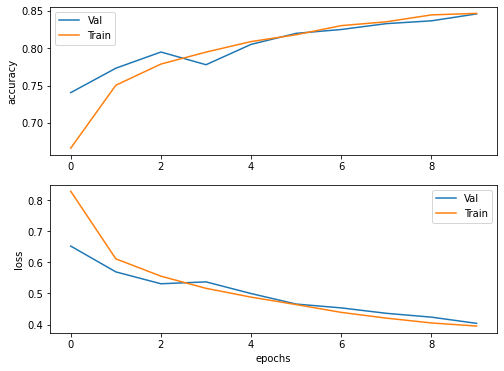

In [ ]:
print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history1.history['accuracy']
loss = history1.history['loss']
val_acc = history1.history['val_accuracy']
val_loss = history1.history['val_loss']
ax1.plot(val_acc, label='Val')
ax1.plot(acc, label='Train')
ax2.plot(val_loss, label='Val')
ax2.plot(loss, label='Train')
    
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


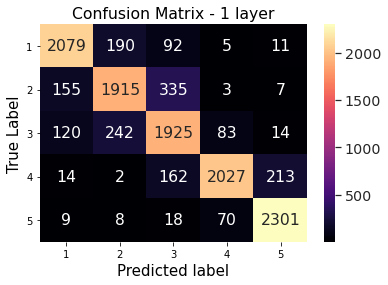

<Figure size 720x504 with 0 Axes>

              precision    recall  f1-score   support

           1       0.87      0.87      0.87      2377
           2       0.81      0.79      0.80      2415
           3       0.76      0.81      0.78      2384
           4       0.93      0.84      0.88      2418
           5       0.90      0.96      0.93      2406

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.86      0.85      0.85     12000



In [ ]:
y_pred = cnn_model_1.predict_classes(x_test)

confusion_mtx = confusion_matrix(y_test, y_pred) 

labels = ['1', '2', '3', '4', '5'] #Check thiss

#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_mtx)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - 1 layer')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

print(metrics.classification_report((y_test+1),(y_pred+1)))

In [ ]:
cnn_model_2 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(5, activation='sigmoid')
])

print(cnn_model_2.summary())

cnn_model_2.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
history2 = cnn_model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=50, verbose=1,
    validation_data=(x_validate, y_validate)
)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                173088    
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 165       
Total params: 173,573
Trainable params: 173,573
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
71/71 [==============================] - 1s 8ms/step - loss: 1.0384 - accuracy: 0.5719 - val_loss

test loss: 0.2620
 test acc: 0.9017


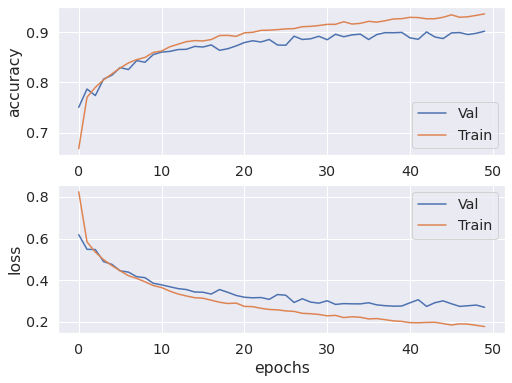

In [ ]:
score = cnn_model_2.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history2.history['accuracy']
loss = history2.history['loss']
val_acc = history2.history['val_accuracy']
val_loss = history2.history['val_loss']
ax1.plot(val_acc, label='Val')
ax1.plot(acc, label='Train')
ax2.plot(val_loss, label='Val')
ax2.plot(loss, label='Train')
    
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


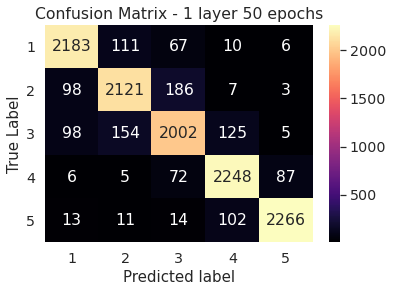

<Figure size 720x504 with 0 Axes>

              precision    recall  f1-score   support

           1       0.91      0.92      0.91      2377
           2       0.88      0.88      0.88      2415
           3       0.86      0.84      0.85      2384
           4       0.90      0.93      0.92      2418
           5       0.96      0.94      0.95      2406

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [ ]:
y_pred = cnn_model_2.predict_classes(x_test)

confusion_mtx = confusion_matrix(y_test, y_pred) 

labels = ['1', '2', '3', '4', '5'] #Check thiss

#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_mtx)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - 1 layer 50 epochs')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

print(metrics.classification_report((y_test+1),(y_pred+1)))

In [ ]:

cnn_model_3 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2, name='Dropout'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(5, activation='sigmoid')
])

print(cnn_model_3.summary())

cnn_model_3.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
history3 = cnn_model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=50, verbose=1,
    validation_data=(x_validate, y_validate)
)



Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                173088    
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 165       
Total params: 173,573
Trainable params: 173,573
Non-trainable params: 0
_______________________________________________

test loss: 0.2477
 test acc: 0.9090


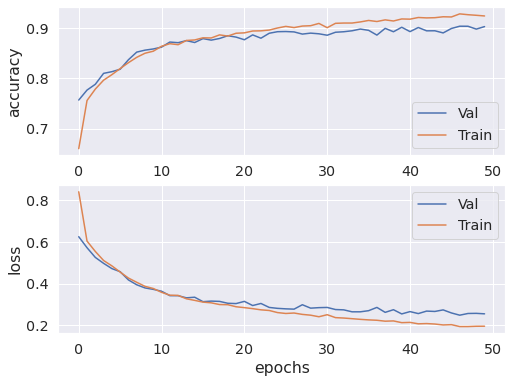

In [ ]:
score = cnn_model_3.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history3.history['accuracy']
loss = history3.history['loss']
val_acc = history3.history['val_accuracy']
val_loss = history3.history['val_loss']
ax1.plot(val_acc, label='Val')
ax1.plot(acc, label='Train')
ax2.plot(val_loss, label='Val')
ax2.plot(loss, label='Train')
    
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


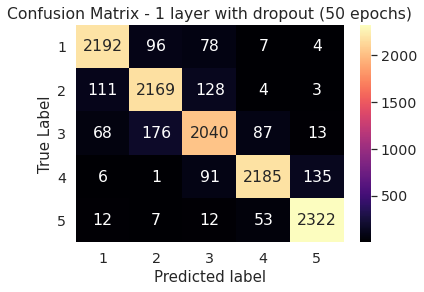

<Figure size 720x504 with 0 Axes>

              precision    recall  f1-score   support

           1       0.92      0.92      0.92      2377
           2       0.89      0.90      0.89      2415
           3       0.87      0.86      0.86      2384
           4       0.94      0.90      0.92      2418
           5       0.94      0.97      0.95      2406

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [ ]:
y_pred = cnn_model_3.predict_classes(x_test)

confusion_mtx = confusion_matrix(y_test, y_pred) 

labels = ['1', '2', '3', '4', '5'] #Check thiss

#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_mtx)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - 1 layer with dropout (50 epochs)')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

print(metrics.classification_report((y_test+1),(y_pred+1)))

In [ ]:
cnn_model_4 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(5, activation='softmax', name='Output')
])

print(cnn_model_4.summary())

cnn_model_4.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout-1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
Dropout-2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
Dense (Dense)                (None, 64)              

In [ ]:
#%%timeit  
history4 = cnn_model_4.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=50, verbose=1,
    validation_data=(x_validate, y_validate)
)

Epoch 1/50
71/71 [==============================] - 1s 12ms/step - loss: 1.0017 - accuracy: 0.5705 - val_loss: 0.6083 - val_accuracy: 0.7452
Epoch 2/50
71/71 [==============================] - 1s 9ms/step - loss: 0.6019 - accuracy: 0.7544 - val_loss: 0.5009 - val_accuracy: 0.8042
Epoch 3/50
71/71 [==============================] - 1s 9ms/step - loss: 0.5022 - accuracy: 0.7971 - val_loss: 0.4405 - val_accuracy: 0.8357
Epoch 4/50
71/71 [==============================] - 1s 10ms/step - loss: 0.4449 - accuracy: 0.8242 - val_loss: 0.4023 - val_accuracy: 0.8444
Epoch 5/50
71/71 [==============================] - 1s 10ms/step - loss: 0.4037 - accuracy: 0.8366 - val_loss: 0.3649 - val_accuracy: 0.8600
Epoch 6/50
71/71 [==============================] - 1s 10ms/step - loss: 0.3668 - accuracy: 0.8578 - val_loss: 0.3560 - val_accuracy: 0.8591
Epoch 7/50
71/71 [==============================] - 1s 9ms/step - loss: 0.3441 - accuracy: 0.8633 - val_loss: 0.3417 - val_accuracy: 0.8635
Epoch 8/50
71/71

In [ ]:
#%timeit
score = cnn_model_4.evaluate(x_test, y_test, verbose=0)

test loss: 0.2335
 test acc: 0.9133


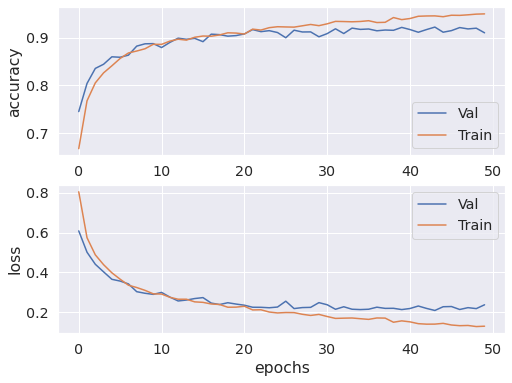

In [ ]:
print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history4.history['accuracy']
loss = history4.history['loss']
val_acc = history4.history['val_accuracy']
val_loss = history4.history['val_loss']
ax1.plot(val_acc, label='Val')
ax1.plot(acc, label='Train')
ax2.plot(val_loss, label='Val')
ax2.plot(loss, label='Train')
    
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
y_pred = cnn_model_4.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


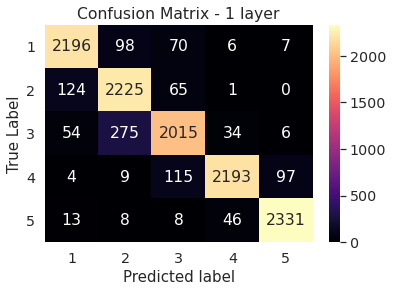

<Figure size 720x504 with 0 Axes>

              precision    recall  f1-score   support

           1       0.92      0.92      0.92      2377
           2       0.85      0.92      0.88      2415
           3       0.89      0.85      0.87      2384
           4       0.96      0.91      0.93      2418
           5       0.95      0.97      0.96      2406

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [ ]:


confusion_mtx = confusion_matrix(y_test, y_pred) 

labels = ['1', '2', '3', '4', '5'] #Check thiss

#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_mtx)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - 1 layer')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

print(metrics.classification_report((y_test+1),(y_pred+1)))

In [ ]:
#x_test1 = x_test1.reshape(x_test1.shape[0], *im_shape)
#y_test1 = (cnn_model.predict_classes(x_test1))+1
#y_test1.shape

In [ ]:
#my_submission = pd.DataFrame({'id': testdata['id'], 'target': y_test1})
#my_submission.to_csv('submission_mnist-01.csv', index=False)

https://www.youtube.com/watch?v=lOZGYzTn9Z8

https://github.com/Coderx7/SimpleNet_Pytorch/tree/5d13ddbba6ae531ced26469c6b0f0ec18665d5ec

https://www.youtube.com/results?search_query=fashion+mnist+keras

https://github.com/markjay4k/Fashion-MNIST-with-Keras/blob/master/pt%204%20-%20Deeper%20CNNs.ipynb

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_3_resnet.ipynb

https://www.youtube.com/watch?v=sAzL4XMke80

https://stackoverflow.com/questions/44151760/received-a-label-value-of-1-which-is-outside-the-valid-range-of-0-1-python


